In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('Job_Placement_Data.csv',usecols=['status','emp_test_percentage','degree_percentage'])

In [20]:
df.head()

,degree_percentage,emp_test_percentage,status
0,58.00,55.0,Placed
1,77.48,86.5,Placed
2,64.00,75.0,Placed
3,52.00,66.0,Not Placed
4,73.30,96.8,Placed


C:\Users\user\AppData\Local\Temp\ipykernel_7560\3180322846.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['degree_percentage'])
C:\Users\user\AppData\Local\Temp\ipykernel_7560\3180322846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['emp_test_percentage'])


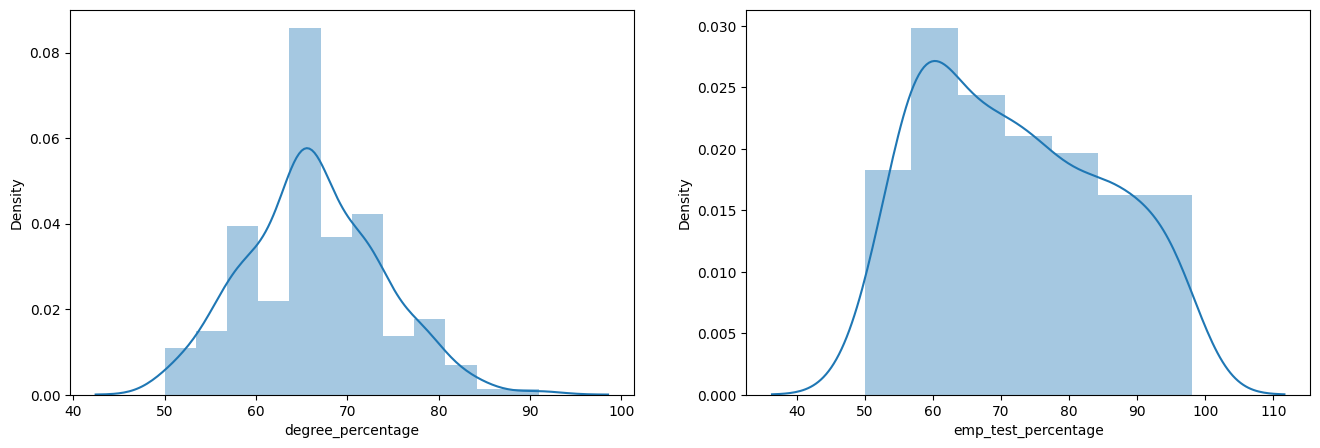

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['degree_percentage'])

plt.subplot(1,2,2)
sns.distplot(df['emp_test_percentage'])

plt.show()

In [22]:
df['emp_test_percentage'].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      55.0
1      86.5
2      75.0
3      66.0
4      96.8
       ... 
210    91.0
211    74.0
212    59.0
213    70.0
214    89.0
Name: emp_test_percentage, Length: 215, dtype: float64>

In [23]:
print('Mean value of cgpa',df['degree_percentage'].mean())
print('std value of cgpa',df['degree_percentage'].std())
print('Min value of cgpa',df['degree_percentage'].min())
print('Max value of cgpa',df['degree_percentage'].max())


Mean value of cgpa 66.37018604651163
std value of cgpa 7.35874328733944
Min value of cgpa 50.0
Max value of cgpa 91.0


In [27]:
# Finding the boundary values
print("Highest allowed",df['degree_percentage'].mean() + 3*df['degree_percentage'].std())
print("Lowest allowed",df['degree_percentage'].mean() - 3*df['degree_percentage'].std())

Highest allowed 88.44641590852996
Lowest allowed 44.29395618449331


In [28]:
#Findung the outliers

df[(df['degree_percentage'] > 88.44) | (df['degree_percentage'] < 44.29)]

,degree_percentage,emp_test_percentage,status
197,91.0,59.32,Placed


# Trimming


In [32]:
new_df = df[(df['degree_percentage'] < 88.44) & (df['degree_percentage'] > 44.29)]
new_df

,degree_percentage,emp_test_percentage,status
0,58.00,55.0,Placed
1,77.48,86.5,Placed
2,64.00,75.0,Placed
3,52.00,66.0,Not Placed
4,73.30,96.8,Placed
...,...,...,...
210,77.60,91.0,Placed
211,72.00,74.0,Placed
212,73.00,59.0,Placed
213,58.00,70.0,Placed


In [33]:
# Calculating the Zscore

df['cgpa_zscore']  = (df['degree_percentage'] - df['degree_percentage'].mean()/df['degree_percentage'].std())

In [34]:
df.head()

,degree_percentage,emp_test_percentage,status,cgpa_zscore
0,58.00,55.0,Placed,48.980772
1,77.48,86.5,Placed,68.460772
2,64.00,75.0,Placed,54.980772
3,52.00,66.0,Not Placed,42.980772
4,73.30,96.8,Placed,64.280772


In [35]:
df[df['cgpa_zscore'] > 68]

,degree_percentage,emp_test_percentage,status,cgpa_zscore
1,77.48,86.50,Placed,68.460772
6,79.00,74.28,Not Placed,69.980772
11,78.30,60.00,Placed,69.280772
21,85.00,95.00,Placed,75.980772
24,78.86,97.40,Placed,69.840772
33,81.00,88.00,Placed,71.980772
40,80.00,60.00,Placed,70.980772
44,81.00,89.00,Placed,71.980772
72,78.00,95.50,Placed,68.980772
75,77.50,74.00,Not Placed,68.480772


#  Capping


In [36]:
upper_limit = df['degree_percentage'].mean() + 3*df['degree_percentage'].std()
lower_limit = df['degree_percentage'].mean() - 3*df['degree_percentage'].std()

In [38]:
lower_limit

44.29395618449331

In [39]:
df['degree_percentage'] = np.where(
     df['degree_percentage'] > upper_limit,
         upper_limit,
         np.where(
              df['degree_percentage']<lower_limit,
             lower_limit,
             df['degree_percentage']
         )
)

In [40]:
df.shape

(215, 4)

In [41]:
df['degree_percentage'].describe()

count    215.000000
mean      66.358309
std        7.320767
min       50.000000
25%       61.000000
50%       66.000000
75%       72.000000
max       88.446416
Name: degree_percentage, dtype: float64